In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## import trajectory data
df = pd.read_csv('trajectory.csv')
df.head()
# df to numpy array
data = df.to_numpy()
data.shape
trajectory = np.delete(data, 2, 1)
trajectory = np.delete(trajectory, -1, 1)
trajectory.shape

(9999, 4)

In [ ]:
%pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.7 MB/s eta 0:00:00


In [ ]:
%pip install 'shimmy>=0.2.1'

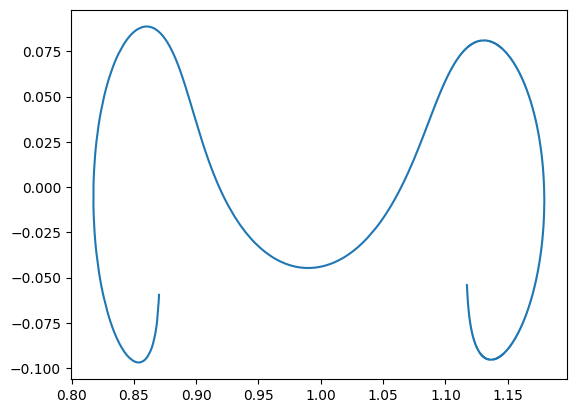

In [ ]:
plt.plot(trajectory[:,0], trajectory[:,1])

In [ ]:
# three body problem env
import gym
from gym import spaces
from stable_baselines3 import PPO, DDPG
import numpy as np

class three_body_env(gym.Env):
    def __init__(self, trajectory):
        self.trajectory = trajectory
        self.state = np.zeros(4)
        self.dt = 0.01
        self.mu = 0.012277471
        self.action_space = spaces.Box(low=-200, high=200, shape=(2,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-10, high=10, shape=(4,), dtype=np.float32)
        self.position = trajectory[0]
        self.steps = 0
        self.max_steps = 1000
        self.reward_range = (-float('inf'), float('inf'))
        self.reset()

    def step(self, action):
        x = self.position[0]
        y = self.position[1]
        xdot = self.position[2]
        ydot = self.position[3]

        a_x = action[0]
        a_y = action[1]

        r1 = np.sqrt((x+self.mu)**2 + y**2)
        r2 = np.sqrt((x-1+self.mu)**2 + y**2)

        xddot = 2*ydot + x -(1-self.mu)*((x+self.mu)/(r1**3)) - self.mu*(x-1+self.mu)/(r2**3) + a_x/100
        yddot = -2*xdot + y - (1-self.mu)*(y/(r1**3)) - self.mu*(y)/(r2**3) + a_y/100

        x = x + xdot*self.dt
        y = y + ydot*self.dt

        xdot = xdot + xddot*self.dt
        ydot = ydot + yddot*self.dt

        self.position = np.array([x, y, xdot, ydot])

        self.steps += 1

        self.position2state()

        reward = 1 - np.linalg.norm(self.position - self.trajectory[self.steps], axis=0)
        done = self.steps >= self.max_steps
        if abs(self.position - self.trajectory[-1]).sum() < 0.005:
            done = True
            reward = 1000
        if self.steps > 1000:
            print('Haji shit kar kard')
            done = True
            reward = -1000
        if np.linalg.norm(self.state) > 4:
            done = True
            print('Oooopss')
            reward = -1000

        return self.state, reward, done, {}

    def position2state(self):
        # find nearest point from position to trajectory
        distance = np.linalg.norm(self.trajectory - self.position, axis=1)
        nearest_idx = np.argmin(distance)
        # estate = position - nearest(index)
        self.state = self.position - self.trajectory[nearest_idx]
        self.state *= 100

    def reset(self):
        self.position = self.trajectory[0]
        self.steps = 0
        self.position2state()
        return self.state

    def render(self):
        pass

    def close(self):
        pass





In [ ]:
env = three_body_env(trajectory)
# Create a PPO agent
# model = PPO("MlpPolicy", env, verbose=1)
model = PPO("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=100000, log_interval=4)
TIMESTEPS = 100000
for i in range (3):
# model = PPO ("MlpPolicy", env, verbose=1)
  model. learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="PPO")
  print(i)


env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 125      |
|    ep_rew_mean     | -905     |
| time/              |          |
|    fps             | 712      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 125          |
|    ep_rew_mean          | -905         |
| time/                   |              |
|    fps                  | 495          |
|    iterations           | 2            |
|    time_elapsed         | 8           

In [ ]:

for i in range (3):
# model = PPO ("MlpPolicy", env, verbose=1)
  model. learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="PPO")
  print(i)


env.close()

Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 254      |
|    ep_rew_mean     | -815     |
| time/              |          |
|    fps             | 677      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 1509685  |
---------------------------------
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
Oooops
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 254        |
|    ep_rew_mean          | -815       |
| time/                   |            |
|    fps                  | 520        |
|    iterations           | 2          |
|    time_elapsed         | 7          |
|    total_timesteps      | 1511733    |
| train/                  |            |
|    approx_kl            | 0.00445725 |
|    clip_fraction        | 0.0502     |
|    clip_range           | 0.2        |
|    entropy_lo

In [ ]:
# test trained model
# save states
position = np.zeros((1000, 4))
env = three_body_env(trajectory)
obs = env.reset()
action_ = []
for i in range(1000):
  action, _states = model.predict(obs, deterministic=True)
  obs, rewards, dones, info = env.step(action)
  position[i] = env.position
  action_.append(action)
  env.render()
  if dones:
    obs = env.reset()

env.close()

Oooopss
Oooopss
Oooopss


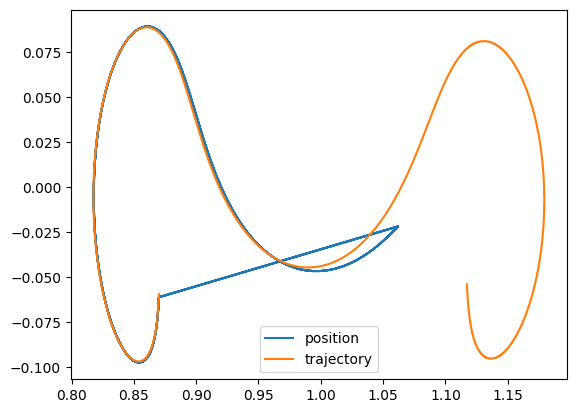

In [ ]:
# plot position
plt.plot(position[:,0], position[:,1])
plt.plot(trajectory[:,0], trajectory[:,1])
plt.legend(['position', 'trajectory'])
plt.show()

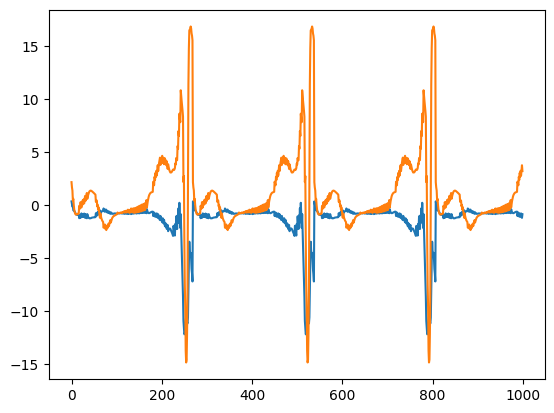

In [ ]:
plt.plot(action_)

In [ ]:
model.save("PPO_thbp")

In [ ]:
model. learn(total_timesteps=1000000, reset_num_timesteps=False, tb_log_name="DDPF")

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -1.89e+03 |
| time/              |           |
|    episodes        | 180       |
|    fps             | 192       |
|    time_elapsed    | 20        |
|    total_timesteps | 180000    |
| train/             |           |
|    actor_loss      | 140       |
|    critic_loss     | 919       |
|    learning_rate   | 0.001     |
|    n_updates       | 178413    |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -2.06e+03 |
| time/              |           |
|    episodes        | 184       |
|    fps             | 170       |
|    time_elapsed    | 46        |
|    total_timesteps | 184000    |
| train/             |           |
|    actor_loss      | 140       |
|    critic_loss     | 8.55e+03  |
|    learning_rate   | 0.001     |
|    n_updates      

KeyboardInterrupt: 